In [1]:
import json
from pathlib import Path


def is_data_file(f):
    return Path(f).suffix == '.json'

# Load data
DATA_PATH = Path('../data/raw')

data = []
for filepath in DATA_PATH.iterdir():
    if not is_data_file(filepath):
        continue
    with open(filepath, 'r') as shot_file:
        data.append(json.load(shot_file))

First, we need to process the data into a nice format for plotting

In [13]:
shot = sorted(data, key=lambda x: -x['shot']['statsbomb_xg'])[10]

In [14]:
shot

{'id': '4f713d76-7003-4b81-8f29-4075e1db1fe4',
 'shot': {'type': {'id': 87, 'name': 'Open Play'},
  'outcome': {'id': 97, 'name': 'Goal'},
  'body_part': {'id': 40, 'name': 'Right Foot'},
  'open_goal': True,
  'technique': {'id': 93, 'name': 'Normal'},
  'first_time': True,
  'key_pass_id': '6a1b5d2b-9d13-46c0-aa16-a50c8e818040',
  'end_location': [119.9, 37.4, 0.6],
  'freeze_frame': [{'player': {'id': 3459, 'name': 'Alfie Mawson'},
    'location': [119.5, 52.6],
    'position': {'id': 5, 'name': 'Left Center Back'},
    'teammate': False},
   {'player': {'id': 10282, 'name': 'Kouassi Ryan Sessegnon'},
    'location': [109.3, 60.7],
    'position': {'id': 6, 'name': 'Left Back'},
    'teammate': False},
   {'player': {'id': 10283, 'name': 'Stefan Marius Johansen'},
    'location': [110.9, 49.8],
    'position': {'id': 16, 'name': 'Left Midfield'},
    'teammate': False},
   {'player': {'id': 3359, 'name': 'Jean Michaël Seri'},
    'location': [109.0, 40.1],
    'position': {'id': 12,

## 1. Literal pitch-plot

Then we can get to the plotting.

First, let's just set up a basic pitch.

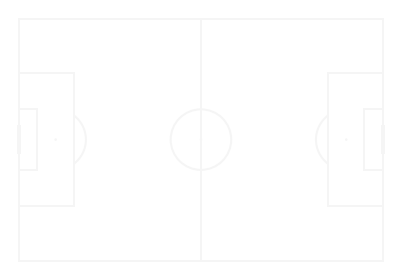

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

def init_pitch():
    pitch = Pitch(pitch_color=None, line_color='whitesmoke', stripe=False)
    fig, ax = pitch.draw()
    return fig, ax

__ = init_pitch()

Very nice!

Now let's layer on the detail.

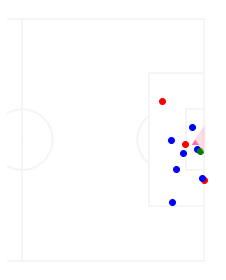

In [9]:
unzip = lambda l: list(zip(*l))


def is_gk(player):
    return player['position']['name'] == 'Goalkeeper'


def shot_marker(shot):
    body_part = shot['shot']['body_part']['name']
    if body_part == 'Right Foot':
        return matplotlib.markers.CARETUP
    if body_part == 'Left Foot':
        return matplotlib.markers.CARETDOWN
    if body_part == 'Head':
        return 'P'
    return 'P'


def extract_xy(freeze_frame, condition=lambda x: True):
    return unzip(
        [p['location'] for p in freeze_frame if condition(p)]
    )


fig, ax = init_pitch()


# Add shot angle
shot_x, shot_y, *__ = shot['location']
post_x = 120
post_y1, post_y2 = (36, 44)
tri = plt.Polygon([[shot_x, shot_y], [post_x, post_y1], [post_x, post_y2]], color='pink', alpha = 0.5)
fig.gca().add_patch(tri)

# Add the teammates
x, y = extract_xy(shot['shot']['freeze_frame'], lambda x: x['teammate'])
ax.scatter(x, y, color = 'red') 

# Add the outfield opposition
x, y = extract_xy(shot['shot']['freeze_frame'], lambda x: not x['teammate'] and not is_gk(x))
ax.scatter(x, y, color = 'blue')

# Add the goalkeeper
x, y = extract_xy(shot['shot']['freeze_frame'], lambda x: not x['teammate'] and is_gk(x))
ax.scatter(x, y, color = 'green')

# Add the shooter/ball/shot location and metadata (body pdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOIAAAEYCAYAAABBbiocAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/Il7ecAAAACXBIWXMAAAsTAAALEwEAmpwYAAAUi0lEQVR4nO3dTWwbZ34G8GeGw0+RIkVRsr79kThJt46LbRc9ZNFLdrE9GNmeWmDrS1qgAXpyUaCHYk89uIfuaQ9bFDl0URRC0aLYojWyCVDEwHY3QA9ZFEjUTRC7sWJLskRJFEmRHFIkZ3p4NZRoURQlcTh/Dp8fYBgmZXKc8OH/nfdTs20bROQt3esLICIGkUgEBpFIAAaRSAAGkUgA44zn2aVK1D/aaU+wIhIJwCASCcAgEgnAIBIJwCASCcAgEgnAIBIJwCASCcAgEgnAIBIJwCASCdB1runKysqgroNoaNy6davvr8mKSCRA14p40eQ7ldSNbw4ir7jZQmRFJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEsDw+gLIX1ZWVry+hKHEikgkACsiueLWrVteX0LfuVntWRGJBGAQiQRgEIkEYBCJBGAQiQRgEIkEYBCJBGAQqbvlZeDaNUDX1e/Ly15fkS9xQJ9Ot7wMvPMOUKmoP3/1lfozANy96911+RArIp3u+98/CqGjUlGPU18xiHS6p0/P9zhdGINIp1taOt/jdGEMIp3u/n0gFmt/LBZTj1NfMYh0urt3gXffBa5eBTRN/f7uu+yocQF7Tam7u3cZvAFgRSQSgEEUiuPoo4VNU4E4jj56WBEF4jj66GEQBeI4+uhhEAXiOProYRAF4jj66GEQBeI4+uhhr6lQHEcfLayIRAIwiEQCMIh+xak5Q4X3iH7EqTlDhxXRjzg1Z+gwiH7EqTlDh0H0Iw+m5ji3pLdv/zq+851XeEt6TgyiHw14ao5zS/rVV4Bta3j+PIR33mH/0HkwiH404Kk5vCW9PM227W7Pd30SACzLgmmaqFarqNVqsCwL+XweAJBMJqHrOnRdRyQSQTQaRTgchqZp/bl6EkHXgU4fI00DLGvw1/Oifp/0e4nTkE/94J97+KJer6NYLMI0TZimiVqtdurPFgqFE48dD2UsFkMikYCuszAPs6Ul1Szt9Dj1pqcg2raNSqWC3d1dFIvFE89HIpHWL13XsbGxAQCYn5+HbdtoNBqoVqswTRP1eh2VSqX1eoFAABMTE0in0wiFQv3919G5LS+rJuXTpypI9++f3aK9f7992BKQuVrkEpUMQP8r63Fdg9hsNpHP55HL5doqXyKRQDweRzQabYXvOCeIExMTJ16z0Wi0qmmxWES1WsXOzg52dnaQSCSQTqcRj8fZfPXARecBOM+pANuYmanjBz8Ice7AOXS9R/z888/tRqMBADAMo1W5gsFg1xd1vjnO+gaybRumabYqrXMtsVgM8/PzCIfD5/m3iHCRiiLFtWudm5hXrwKrq729Rq//7wepX9fUh9e52D1io9FANBpFJpPB+Ph436uUpmmIxWKIxWJoNBrY29vDzs4OKpUKHj9+jJmZGaTT6aGpjsM+s4zzALzTtZdkdnYWN27cQDKZdD0MhmFgamoKN2/eRDKZhG3beP78OZ48edK1Q0iSoenG3y53fJhbdHinaxAnJycHXo0Mw8Di4iKWlpZgGEarOjpDIpINRUX52ZfATz4Gfva/wLNNYDsHFEuAWcXf/HUDsVj7rcp5Ol069ZJTb8SuvhgfH0csFsPz589RKBSwtrYGy7KQTqe9vrRTie/G360A//YFoNvAfhZIhgDNBoIBIKDjD34T+Pq/aHjvP4P49FEIVTuEP3w7iDu/ZwCWoQYMT5HL5VqddIC6/x+WWwoJxAYROKqOkUgEW1tb2NjYgGVZyGQyXl9aR6K78W0b+MdPgHpTTdN4UgF+vgt871UgVwAsFcibX9PxZ682AasMWCXVvfDk8DWMABAOAZEQEAoCwSAQNLCT38Pm1lbb2zGE5yM6iI6pqSkEAgFsbGxgc3MTuq6LrIzt3fjCek1//hT4YvfozzaAz3aBz4rAG0vAfgnYyQO1OmDoQNBQU2NaP2+rX9UaUDHV39eAarUK3axiWgNi6RS294to6hpQO1CvwckaPRmKIAJAOp1udeBsbGwgEAggmUx6fVkniNz0qWkBHzzq/Nz7j4A3FoHUOJBMAPtlYDcPVA+AwLFAOr+OBatWO0CxVgU0G4mxBKJfPEbk418iUCkDY3HgG78FvPIKEA4C4bCqoiFVRWEE2oM+4oYmiIDqPLIsC1tbW1hfX0c0GuVsnF4EdOAvfwdo2kAqcvT4nqmqX+AwXJoGjMeBxBhQqapAVqqqeRoKtgWn0WigWFSdM7GxOKJP/g948ABGvX74E1vA2lPgre8Cr72mXuewih6+GRAyDpu6hyE1DBXSwOhV0aEKIqCaqc6snPX1dVy7do33I71IdJgcMRHt/LOaBoxFgVhENTFzBaBYViEKBmFrQKGgJmCEw2GMjY0BHz4EWiE8VK8DH34IvN5hANy21YzwUkW9NqBe34aqlqHDKhoejSo6dEEEgLm5OZTLZZTLZezt7Ym8X/QFTVPVam4ayNSBvSKQ34dZqcBq1BEwjMOJHgBOG7o47XFNAwIB9es45160dgCY1fb1P9qxKhoOAaGQ6vENGidfZ8gMZRANw8Dc3ByePXuGzc1NxONxNlHdFgoCVyax/EEM7/9zGW+8WkImbeHW1y187VYASCaBQv7k3zvvfXyHe9GWblU0EDi8F3VCetjMNYbjIz4cV9lBMplEoVBgE3WAlpdt/MmfhmGaUfzrh2l849Uyfn87j7B+gJe+/W3gP/69vXkaDALferN/F3BWFT04AMxa++JIDZgu11EPaOqe12nmOj26Qj4zl14Y3MmgJv42Gg08evQIzWYT169fV/cq5JqlJQvPnrVXKl238bvfrOCn/5AHPvsczY8+gr6xjk+jv42HeBMFM4RkEnjzW8Dt1z24aNvGdjYL3QYmUxNHFRRQnUKhoBoXDYePAvri0A1OLoG64Ge7fwuDJTEMA+l0Gtvb28jlcgyiy9bWTn6OLEvDB78YA67FgCuTyGYmsfOVgY9/Gcf+tgEbQL4APHigfn7gYdQ02JqGpgYVOIdTRet1NVRjFwFoR0F9oUc32LTQ1DVYh6/Zb0PfT+yseSwWi6i/2GtHfWOaJmZmOv/3XVqC+nDGItiNGXj7r67hF5+MYT5Tx+L0AYKGhXodePjhYK+5K+c+1DDUvWUkfFgZQ+rPtq2GXLb3gPUspipNzJbqiDQv1Eg809AHMRQKIZFIwLZt7O3teX05vpXP53Hv3hai0fZNaDpN4fufX43hx+9P4S/+bhE//e8kppJNXL1SQ80UsIFNL5x70aChwhkJoXF4W6q7k8PhDyKgBvoBNfH4jHteugDbtpHP53HnTgE/+lH9zM3hnMqZKxr4yX+l8ed/u4h/+nASM1OWagY2mh78K2TzRRDHxsYQCoXQaDRQKpW8vhzfKZVKaDabCIVCePvtEFZX1SjC6mrn6Xz37m21bataNgP46FdJhH5tEZidUk3C6gFQb3Te/m0E+SKImqZhfHwcAFB5cWUuXVq5rMbsel0gfudOoeO2qt+7qwPJOHB9Hli4onosa3XgoD7ygRzqXtPjolE1Xcs0TY+vxH+cIMZe3D28i66T3zUNiMfUNLpqTU2h268A0IDwyaGDUeDLIHJRav84G0gD5wtiTzQNiEaA+cM5rXtFoLB/NHwgYAnVJ1uf4uGThyjUCngtdgONRAq/sfDNvr+P9//SPgkGgwgEAmg2m3B2nhsFbp9HWq1WAQDhcBgBN+dzhkPATAa4sQhMplSHTvUAaHrXsfPJ1qd48MUD5Gt52LBRaVbw4y/+Hu89fa/v7+WbIGqahkhELfEZleZp++EvR7vG9TOMztjswObyBg1gagJ4aRGYTqvqWK150tP68MlD1K32sdOadYAfrvyw7+/lmyACR81T51vc7waxa9zAg+gIBIB0ErixoFZ/6LoK5AB7Wgu1zitHNs3Nvr+Xb+4RAbSaTpaEk08GYBC7xjlBPGtTadfo+tFi5bKpOnbKpno85G7HTjKcRL6WP/H4THSm7+/lakUc9JQzZ+v/UQniIPYhbR7eow36oKB6vY61tTXs7++rB5ye1sUZNfwRj6mhj9qB2vjKBW9efxNBvf0LKKyHcO/Wvb6/l6v/dXd2dtx8+ROcntJRmV0zyPNIB90LvbOzg3w+37ZF4+GFqHmh89Oq2ZoaP5q43ecv4NtXXsdbr7yFVDgFDRpigRj+6JU/xp2lO319H8DlpmkqlXLz5U9wAjgqQxeD3DVu0F9uyWQSpVKp40FGLYeLlTGZBAoltd7Qahzu09qfHt7bV17H7SuvI5vNIti0sRcx4MaUEVeD6HSeDIrTJB2VIALu7xrnVXM/Fovh5s2bvf2wYaghj4lxtXJ/J3+0C50xHFto+Kqzxvmw8ODT/nE6aYZiiZmuA6mEmka3X1EVsnaAgGWr9YiC+SqIxwefqT+GKogOTQPGx4BEDDBrOCgWEGlaqnPH5Z7Wi/JV6XAG8gfdJB4ot6fSvGAog+g4tlg5GwuqcNacjh1ZHXq+qYj1eh2NRgO6rvt3RzcPDmB0WhfVahWWZQ1ts78e0NQSrEwK2NtX81ptW8yGxt5fQZ84zdJIJOLfzhoPDmA0DAPhcLh1uvPQCwbV1LmXFtVUOsvybArdcb4J4kg0Sz06gNHZlMtXaz2NgOppfelwsbKmDXwK3XG+CaIzA8PXQfToSF8niMVi0dX38YSuq8N3biwA81dUU7V6MPDFyr4IommaME0Tuq63Vur7Uh+m0lykryeRSEDXdZimOTTHqJ+bpqn5rFfngGtzR+d+1AYTSF8EMZfLAVBbKw5rZ0JP7t5Fxz0oeuyoueiyKV3XkUgkAIzA8dzOYuWFGeD6gppwXqsj2LRP3x24D4b+U9tsNpHP5wFgNA6juXsXZ+7edIrL9PU40xX39vZGZi4vwiFgNgO8tIhiSIelabBdSuPQBzGfz8O2bYyNjXEg/wyX6euJx+MIh8Oo1+utL76RETSwHzbwfMyAGXAniUMdRMuysLurjqMeiWp4SZfp69E0DZlMBgCQzWZHZqnZcbZzUpULhjqI2WwWBwcHCIVC/u6k6ZPL9vWkUqlWVXS+AEfF8UNn3DhcaWiDWKlUWusdFxYW/DuI30eX7OuBpmmYmVGr07PZrH97UD0wlEG0LAvr6+sAgEwm0/9t/nzsEn09ANRQRiqVgm3bWF9fH52OG5cNZRCdb+NwOIzp6WmvL2fkzMzMwDAMVCoVZLNZry/HF4YuiMVisdUknZ+f9/e4oVCGYWB+fh4AsL297f+xxQEYqk9xqVTCs2fPAADT09NsknookUi07hfX1tb8NQ/VA0MTxHK5jKdPn8K2baTTaUxNTXl9SSNvcnISExMTsG0bq6urrTMy6PyGIoj7+/tYXV2FZVlIJpOYnZ1lL6kAmqZhbm4OyWQSlmVhdXW157874PXN4oleGGzbNnZ3d7G5qXZWnpiYwNzcHEMoiKZpWFhYgK7rbSc2dzsIyIP1zeKJrYi1Wg1ffvllK4SZTIYhFMqpjM7Mm7N4sL5ZvK4VsVwut9aiDYpTBbe2tmDbdquHzpn9TzI5g/1Oj3a3L0yP1jeL1jWIT548QTqdxuTkpOsTqm3bRqlUQjabba22T6VSmJ2ddfc4MBq4pSXVHO30+Kg68x4xl8shl8shHo8jnU4jkUj0tXnYaDSQz+eRy+VwcHCgLopV0Nfu32+/RwTcOypgWHQN4ssvv4ydnR0UCgWUSiWUSiUEg0FMTEwgHo8jEolcaEC90WjANE0UCgUUCoXWNCnntScnJ1kFfWyQRwUMi65BjEQiWFhYwOzsLPb29lpVK5vNtqY2RSIRRCIRRKPRE8GsVquwbbsVPNM0Ua1WT+yR6Va1JbncPipg2PQ0fBEIBJDJZDA5OYlyuYx8Pt/av6RaraJarXZcLPr48eOOr6frOiKRCGKxGCYmJriglwZiZWXF60s41bnGETVNQzweRzweB6BWQVSr1Va1q9VqsG27bet7TdMQCATaqqbzOBEplxrQ13UdsVjsxJxP55un59N8yN+Wlz29IezXQl43K6romTXkA5xG0xOxM2vIJziNpicMIrmL02h6wiCSuzw6JmDYMIjkrj4cEzAKGERy12W3jhsR7DUl93EazZlYEYkEYBCJBGAQiQRgEIkEYBCJBGAQiQRgEIkEYBCJBGAQiQRgEIkEYBCJBGAQiQRgEIkEYBCJBGAQiQRgEIkEYBCJBGAQiQRgEOlclpfVmfe6rn5fXvb6ivyBe9ZQz7hpt3tYEaln3LTbPQwi9YybdruHQaSecdNu9zCI1DNu2u0eBpF6xk273cNeUzoXbtrtDgaRXCH5vHqJ2DQlEoAVkfqqX+fVS+RmlWdFJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEEkEoBBJBKAQSQSgEGkk3j22sBxFzdqx7PXPMGKSO149ponGERqx7PXPMEgUjueveYJBpHa8ew1TzCI1I5nr3mCvaZ0Es9eGzhWRCIBGEQiARhEIgEYRCIBGEQiARhEIgEYRCIBGEQiARhEIgEYRCIBGEQiARhEIgEYRCIBGEQiARhEIgEYRCIBGEQiARhEIgEYRCIBGEQiARhEIgEYRCIBGEQiARhEIgG6bjC8srJyqRe/7N8nGhWsiEQCaLZtd3u+65NEdC7aaU+wIhIJwCASCcAgEgnAIBIJwCASCcAgEgnAIBIJwCASCcAgEgnAIBIJ0HXSN7pMySGi/mFFJBKAQSQSgEEkEoBBJBKAQSQSgEEkEuD/AQ2NYrFG2qpoAAAAAElFTkSuQmCCart)
ax.scatter(shot_x, shot_y, color = 'hotpink', marker=shot_marker(shot))

ax.set_xlim(55, 125)

None  # Supress last output

In [10]:
fig.savefig(
    Path('../data/processed/TEST.png'),
    dpi=280
)

## 2. (soft?) Voronoi pitch-plot

In [11]:
import scipy.spatial
from scipy.spatial import voronoi_plot_2d, Voronoi

xy = [shot['location'][0:2]] + unzip(extract_xy(shot['shot']['freeze_frame']))

# Create a bounded voronoi by reflecting points in each axis
def reflect_x(xy, max_x=120):
    return [[max_x + (max_x - x), y] for x, y in xy]

def reflect_y(xy, max_y=80):
    return [[x, (max_y + (max_y - y))] for x, y in xy]

v = Voronoi([
    *xy,
    *reflect_x(xy, 121),
    *reflect_x(xy, -1),
    *reflect_y(xy, 81),
    *reflect_y(xy, -1),
])

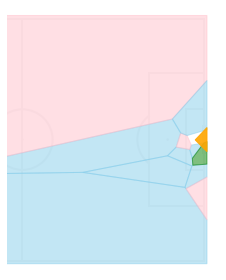

In [18]:
fig, ax = init_pitch()


def get_region_colour(player):
    if player['teammate']:
        return 'pink'
    if not player['teammate'] and not is_gk(player):
        return 'skyblue'
    if is_gk(player):
        return 'green'

    
for player, region_ix in zip(shot['shot']['freeze_frame'], v.point_region[1:]):
    region = v.regions[region_ix]
    if (-1 in region) or (len(region) == 0):
        continue
    
    xy = [list(v.vertices[i]) for i in region]
    plt_region = plt.Polygon(
        xy, 
        color=get_region_colour(player), 
        alpha = 0.5
    )
    fig.gca().add_patch(plt_region)


# Add shot angle
shot_x, shot_y, *__ = shot['location']
post_x = 121
post_y1, post_y2 = (36, 44)
tri = plt.Polygon([[shot_x, shot_y], [post_x, post_y1], [post_x, post_y2]], color='orange', alpha = 0.9)
fig.gca().add_patch(tri)

    
ax.set_xlim(55, 125)

None  # Supress last output